# Homework 11

The following code simulates 40 data points for training your models (stored in DataFrame `df_train`) and 40 data points for testing your models (stored in DataFrame `df_test`).  Both sets of data are simulated from the same distribution.

### Question 0:  Simulate the data
Run the following code to simulate training data (in DataFrame `df_train`) and testing data (in DataFrame `df_test`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# number of data points
n = 40

# variance of noise added to data
noise_std = 0.35

x_data_train = np.random.uniform(-5, 5, n)
x_data_test = np.random.uniform(-5, 5, n)

# define a function relating input to output
f = lambda x: 0.3 * x**2

# generate noisy data from the function

y_data_train = f(x_data_train) + np.random.normal(0, noise_std, n)
y_data_test = f(x_data_test) + np.random.normal(0, noise_std, n)

data_train = {"x": x_data_train, "y": y_data_train}
data_test = {"x": x_data_test, "y": y_data_test}
df_train = pd.DataFrame(data_train).sort_values("x")
df_test = pd.DataFrame(data_test).sort_values("x")

### Question 1: Visualization

a) Plot the training data on a scatterplot.

<AxesSubplot:>

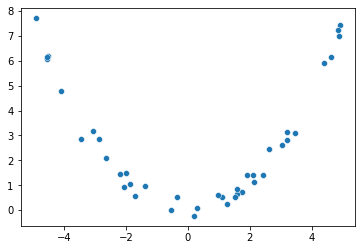

In [8]:
sns.scatterplot(x=x_data_train, y=y_data_train)

b) What shape does the training data have?

**Answer 1b:** The data is parabolic in shape. The regression is second order.

### Question 2:  Linear model

a) Fit a linear regression model to the training data.

In [32]:
lr_model = LinearRegression()
lr_model.fit(df_train[['x']],df_train['y'])
y_pred = lr_model.predict(df_train[['x']])

2b) Plot this linear model on a scatter plot of the testing data.

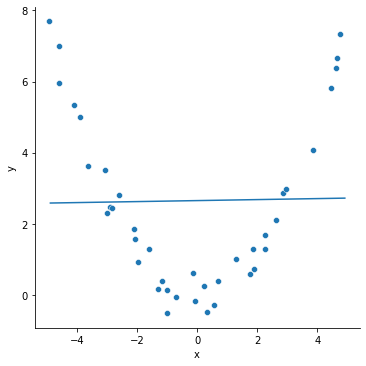

In [33]:
sns.relplot(x = "x", y = "y", data = df_test)
plt.plot(df_train['x'], y_pred)

2c) How well does this linear model fit the test data?

**Answer 2c:** The linear model does not fit the test data well at all.

2d) Predict the `y` values for the testing data using your linear model, and compute the mean squared error of these predictions.  

In [36]:
y_pred = lr_model.predict(df_test[['x']])
ms = mean_squared_error(df_test['y'], y_pred)
print(f"Mean-Squared value: {round(ms, 2)}")

Mean-Squared value: 5.82


### Question 3: Degree 2 polynomial model
a) Fit a polynomial model of degree 2 to the training data.

In [39]:
# Create/Transform
poly_feat = PolynomialFeatures(degree=2)
poly = poly_feat.fit_transform(df_train[['x']])

In [40]:
# Fit
poly_model = LinearRegression()
poly_model.fit(poly, df_train['y'])
poly_pred = poly_model.predict(poly)

3b) Plot this polynomial degree 2 model on a scatter plot of the testing data.

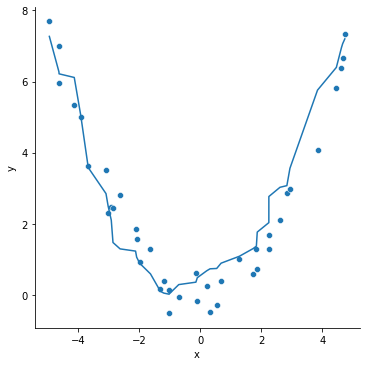

In [41]:
sns.relplot(x = "x", y = "y", data = df_test)
plt.plot(df_test["x"],poly_pred)

3c) How well does this polynomial degree 2 model fit the test data?

**Answer 3c:** Pretty well. It looks like there is a better correlation here than with the previous example.

3d) Predict the `y` values for the testing data using your polynomial degree 2 model, and compute the mean squared error of these predictions. 

In [42]:
poly_pred = poly_model.predict(poly)
ms = mean_squared_error(df_test['y'], poly_pred)
print(f"Mean-Squared Error: {round(ms, 2)}")

Mean-Squared Error: 0.48


### Question 4: Degree 20 polynomial model
a) Fit a polynomial model of degree 20 to the training data.

In [46]:
# Create/Transform
poly_feat_20 = PolynomialFeatures(degree=20)
poly_20 = poly_feat_20.fit_transform(df_train[['x']])

In [47]:
# Fit
poly_model_20 = LinearRegression()
poly_model_20.fit(poly_20, df_train['y'])
poly_pred_20 = poly_model_20.predict(poly_20)

4b) Plot this polynomial degree 20 model on a scatter plot of the testing data.

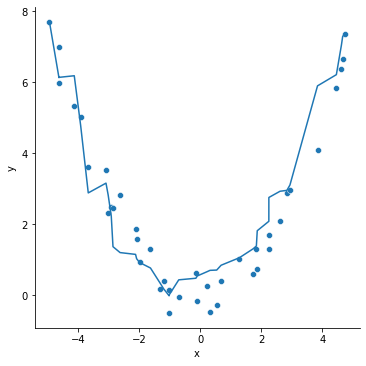

In [48]:
sns.relplot(x = "x", y = "y", data = df_test)
plt.plot(df_test["x"],poly_pred_20)

4c) How well does this polynomial degree 20 model fit the test data?

**Answer 4c:** Reasonably well, but less so than the 2 degree model.

4d) Predict the `y` values for the testing data using your polynomial degree 20 model, and compute the mean squared error of these predictions.

In [50]:
poly_pred_20 = poly_model_20.predict(poly_20)
ms = mean_squared_error(df_test['y'], poly_pred_20)
print(f"Mean-Squared Error: {round(ms, 2)}")

Mean-Squared Error: 0.5


### Question 5: Conclusion

a) Which of the three models has the best mean squared error on the testing data?  The worst? 

**Answer 5a:** The best was the 2-degree polynomial model and the worst was the linear regression.

5b) Which of the three models do you think fits the data best?  Why?

**Answer 5b:** I think the 2-degree polynomial model fits the data the best. Its MSE is relatively low and it seems to have a strong fit.